In [3]:
import pandas as pd
import numpy as np
import zipfile
import re
from datetime import datetime

In [4]:
!pip3 install spacy

In [5]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science Lab/tweets_3k.csv', index_col=0)
dataset.head()
# for term in dataset:
#   print(term)
# print(dataset["Text"])
allText=[]
for tweet in dataset["Text"]:
  allText.append(tweet)
print(allText)

['RT @IngrahamAngle: Reminder: China, still actively covering up the viral origins story,  wants Biden to win.  “Chinese Communist Party Arre…', 'RT @MsAvaArmstrong: Smart suburban women WILL vote for Trump.\nSmart city women WILL vote for Trump.\nSmart rural women WILL vote for Trump.…', "RT @AynRandPaulRyan: 26% of voters trust Trump for information on the coronavirus.\n\n67% trust Dr. Fauci.\n\nThat's what this is all about.…", 'RT @Vic_Goes: Tr*mp supporters really abt to be like, "Biden only won cause they counted the ballots"', 'RT @NaomiBiden: I am proud to be your granddaughter every single day @JoeBiden. But tonight, I am just as proud to be an American. https://…', 'RT @mcoombs13: @AnIllicitWriter @realDonaldTrump Yes yes yes! https://t.co/M7y3hxTWA9', '@realDonaldTrump IN OTHER NEWS ALMOST 130000 DEATHS DUE TO PISS POOR 1968 COWARD LEADERSHIP https://t.co/zcNUJs2Ilb', 'RT @DGComedy: What in gay hell is this bullshit? Also there’s like 12 people in the room. Also I’m no longe

Start of Using NLTK for Topic Extraction

In [11]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [12]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
en_stop.add("SCREEN_NAME")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [15]:
import random
text_data = []
for line in allText:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        print(tokens)
        text_data.append(tokens)

['trump', 'racism', 'ilhan', 'somalia', 'hate', 'country', 'hate', 'country']
['whatever', 'outcome', 'careless', 'irresponsible', 'decision', 'covid19', 'fail', 'response', 'since']
['please', 'consensus', 'coalesce', 'around', 'president', 'endorsement', 'impress']
['trumpers', 'chant', 'lebron', 'suck', 'lebron', '1,000x', 'trump', 'total', 'pathetic', 'loser']
['finding', 'trump', 'criminal', 'enterprise', 'first']
['people', 'bring', 'crime', 'biden', 'question', 'people', 'bring']
['instead', 'worrying', 'trump', 'saying', 'kareem', 'dial', 'disturb', 'violent']
['running', 'election', 'bring', 'prosperity', 'nevada', 'violent', 'criminal', 'behind', 'ensure']
['turn', 'twitter', 'censoring', 'addict', 'foreign', 'lobby', 'scandal']
['donald', 'trump', 'vote', 'enough', 'enough']
['court', 'implicate', 'sabotage', 'trump', 'campaign', 'rule', 'steele', 'dossier']
['calling', 'troops', 'sucker', 'loser', 'earn']
['thing', 'disinformation', 'conspiracy', 'social', 'medium', 'networ

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [17]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=50)
for topic in topics:
    print(topic)

(0, '0.073*"trump" + 0.018*"hate" + 0.018*"country" + 0.018*"enough" + 0.010*"could" + 0.010*"racism" + 0.010*"standing" + 0.010*"daylight" + 0.010*"outside" + 0.010*"broad" + 0.010*"sign" + 0.010*"black" + 0.010*"insane" + 0.010*"murder" + 0.010*"know" + 0.010*"attend" + 0.010*"event" + 0.010*"indeed" + 0.010*"satan" + 0.010*"already" + 0.010*"contempt" + 0.010*"illness" + 0.010*"visceral" + 0.010*"seed" + 0.010*"gopsuperspreaders" + 0.010*"convince" + 0.010*"disability" + 0.010*"soldier" + 0.010*"outward" + 0.010*"obvious" + 0.010*"somalia" + 0.010*"ilhan" + 0.010*"status" + 0.010*"sweetie" + 0.010*"give" + 0.010*"christian" + 0.010*"giving" + 0.010*"likely" + 0.010*"matter" + 0.010*"swing" + 0.010*"thinking" + 0.010*"earn" + 0.010*"sucker" + 0.010*"troops" + 0.010*"vote" + 0.010*"kissing" + 0.010*"start" + 0.010*"magnet" + 0.010*"hurricane" + 0.010*"asteroid"')
(1, '0.051*"trump" + 0.020*"bring" + 0.020*"people" + 0.014*"donald" + 0.014*"lebron" + 0.014*"nothing" + 0.014*"criminal" 

In [18]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.046*"trump" + 0.024*"biden" + 0.017*"election" + 0.017*"could"')
(1, '0.040*"trump" + 0.015*"lebron" + 0.015*"hate" + 0.015*"country"')
(2, '0.060*"trump" + 0.020*"people" + 0.019*"bring" + 0.019*"america"')


In [21]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [20]:
!pip3 install pyLDAvis

     |████████████████████████████████| 1.6MB 5.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=73eb23f713695a4c6eed95054ee6f16978824d96e4ee988c45061f460056b985
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [22]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:418: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
Trying Something New

In [23]:
dataset['word_count'] = dataset['Text'].apply(lambda x: len(str(x).split(" ")))
dataset[['Text','word_count']].head()
dataset.word_count.describe()

count    2966.000000
mean       20.203641
std         4.338735
min         2.000000
25%        18.000000
50%        21.000000
75%        23.000000
max        44.000000
Name: word_count, dtype: float64

In [24]:
freq = pd.Series(' '.join(dataset['Text']).split()).value_counts()[:20]
freq
# freq1 =  pd.Series(' '.join(dataset 
#          ['Text']).split()).value_counts()[-20:]
# freq1

RT                  1986
the                 1672
to                  1335
Trump               1054
a                    999
and                  976
of                   912
is                   907
for                  579
in                   571
I                    505
@realDonaldTrump     473
you                  466
that                 394
are                  365
Biden                308
on                   298
be                   278
his                  278
The                  277
dtype: int64

In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [97]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [98]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["RT","SCREEN_NAME", "rt", "http", "https", "co", 'amp', 'donald', 'like', 'joe', 'say', 'want', 'get', 'know', 'country', 'would', 'make', 'going', 'one', 'year', 'day', 'time', 'love', 'great' ]
stop_words = stop_words.union(new_words)

In [99]:
corpus1 = []
for i in range(0, 2966):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['Text'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [131]:
corpus = []
for text in corpus1:
  new_text = text.replace('realdonaldtrump', 'trump')
  final = new_text.replace('joebiden', 'biden')
  final = final.replace('coronavirus', 'COVID 19')
  final = final.replace('corona', 'COVID 19')
  final = final.replace('covid', 'COVID 19')
  final = final.replace('rona', 'COVID 19')
  final = final.replace('trump trump', 'trump')
  #final = final.replace('president trump', 'trump')
  final = final.replace('united state', '')
  final = final.replace('white house', '')
  final = final.replace('nobel peace prize', 'nobel prize')
  final = final.replace('president elect', '')
  corpus.append(final)

In [74]:
corpus1[202]

'michaelcohen potus realdonaldtrump demanding ag barr indictment arrest political enemy ex'

In [75]:
corpus[202]

'michaelcohen potus trump demanding ag barr indictment arrest political enemy ex'

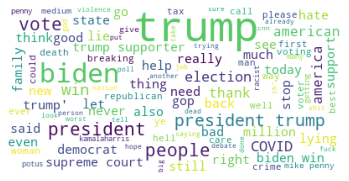

In [132]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['screen_name'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['ingrahamangle',
 'reminder',
 'china',
 'still',
 'actively',
 'covering',
 'viral',
 'story',
 'biden',
 'win']

[Text(0, 0, 'trump'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'president'),
 Text(0, 0, 'win'),
 Text(0, 0, 'people'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'american'),
 Text(0, 0, 'election'),
 Text(0, 0, 'america'),
 Text(0, 0, 'covid'),
 Text(0, 0, '19'),
 Text(0, 0, 'court'),
 Text(0, 0, 'supporter'),
 Text(0, 0, 'need'),
 Text(0, 0, 'news'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'supreme'),
 Text(0, 0, 'good'),
 Text(0, 0, 'lie'),
 Text(0, 0, 'right')]

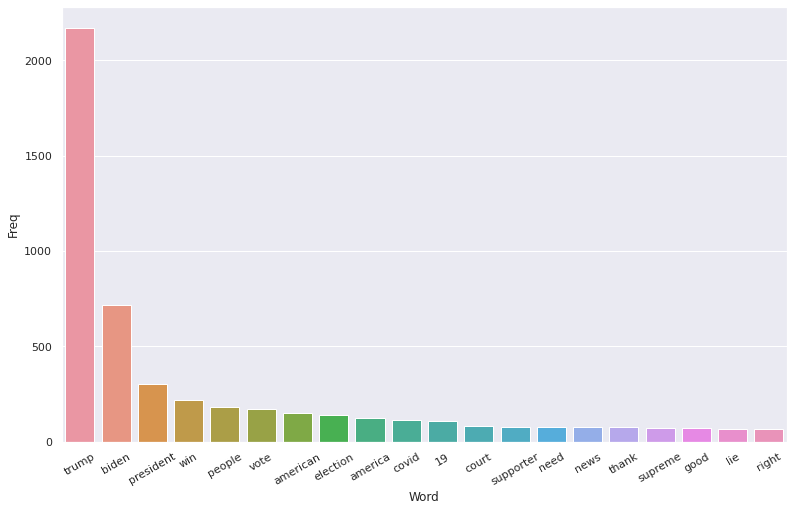

In [134]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0        president trump   132
1               covid 19   111
2          supreme court    69
3              biden win    65
4        trump supporter    53
5              trump win    37
6             mike penny    35
7            nobel prize    32
8              fake news    26
9         trump campaign    22
10         court justice    22
11            vote trump    20
12         kamala harris    20
13          hunter biden    19
14       social security    19
15    biden kamalaharris    18
16          trump racist    18
17  trump administration    18
18            trump said    17
19       american people    17


[Text(0, 0, 'president trump'),
 Text(0, 0, 'covid 19'),
 Text(0, 0, 'supreme court'),
 Text(0, 0, 'biden win'),
 Text(0, 0, 'trump supporter'),
 Text(0, 0, 'trump win'),
 Text(0, 0, 'mike penny'),
 Text(0, 0, 'nobel prize'),
 Text(0, 0, 'fake news'),
 Text(0, 0, 'trump campaign'),
 Text(0, 0, 'court justice'),
 Text(0, 0, 'vote trump'),
 Text(0, 0, 'kamala harris'),
 Text(0, 0, 'hunter biden'),
 Text(0, 0, 'social security'),
 Text(0, 0, 'biden kamalaharris'),
 Text(0, 0, 'trump racist'),
 Text(0, 0, 'trump administration'),
 Text(0, 0, 'trump said'),
 Text(0, 0, 'american people')]

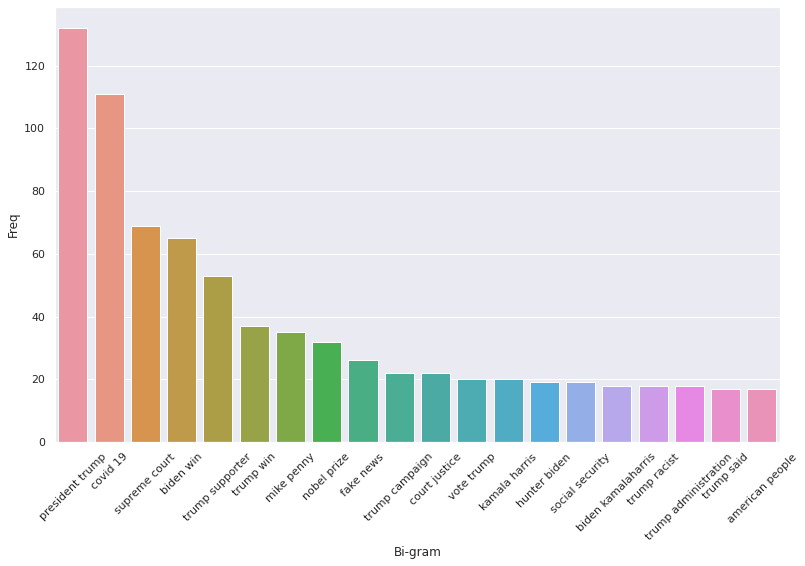

In [135]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                    Tri-gram  Freq
0      supreme court justice    22
1      supreme court nominee    10
2        beauty parlor owner    10
3      biden america honored     9
4     america honored chosen     9
5        honored chosen lead     9
6           chosen lead work     9
7            lead work ahead     9
8            work ahead hard     9
9         ahead hard promise     9
10       trump supreme court     9
11        biden every member     8
12        every member lgbtq     8
13    member lgbtq community     8
14     lgbtq community loved     8
15  community loved accepted     8
16    loved accepted whether     8
17     accepted whether come     8
18        trump nancy pelosi     8
19            trump covid 19     8


[Text(0, 0, 'supreme court justice'),
 Text(0, 0, 'supreme court nominee'),
 Text(0, 0, 'beauty parlor owner'),
 Text(0, 0, 'biden america honored'),
 Text(0, 0, 'america honored chosen'),
 Text(0, 0, 'honored chosen lead'),
 Text(0, 0, 'chosen lead work'),
 Text(0, 0, 'lead work ahead'),
 Text(0, 0, 'work ahead hard'),
 Text(0, 0, 'ahead hard promise'),
 Text(0, 0, 'trump supreme court'),
 Text(0, 0, 'biden every member'),
 Text(0, 0, 'every member lgbtq'),
 Text(0, 0, 'member lgbtq community'),
 Text(0, 0, 'lgbtq community loved'),
 Text(0, 0, 'community loved accepted'),
 Text(0, 0, 'loved accepted whether'),
 Text(0, 0, 'accepted whether come'),
 Text(0, 0, 'trump nancy pelosi'),
 Text(0, 0, 'trump covid 19')]

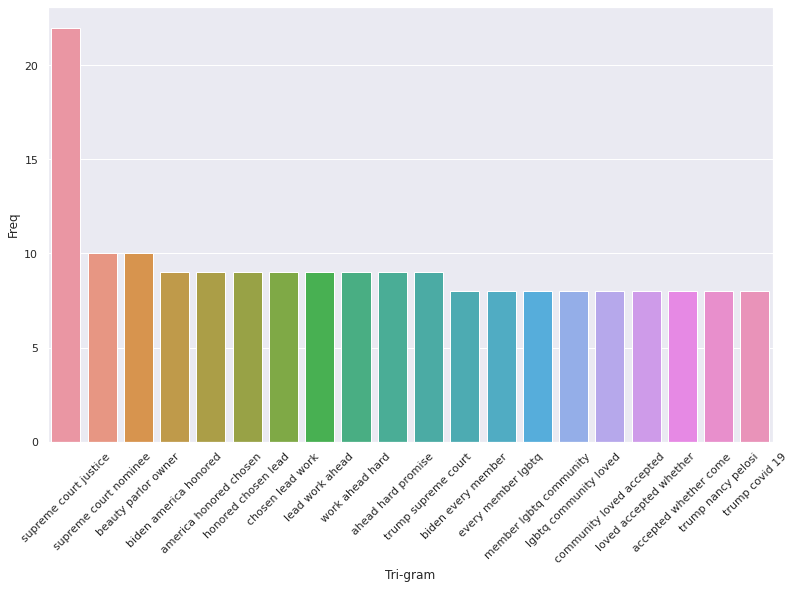

In [136]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [137]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]
doc=""
for line in corpus:
  doc= doc + str(line)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [138]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Text:
ingrahamangle reminder china still actively covering viral origin story want biden win chinese communist party arremsavaarmstrong smart suburban woman vote trump smart city woman vote trump smart rural woman vote trumpaynrandpaulryan voter trust trump information COVID 19 trust dr faucivic go tr mp supporter really abt biden cause counted ballotnaomibiden proud granddaughter every single biden tonight proud americanmcoombs anillicitwriter trump yes yes yes hxtwatrump news almost death due piss poor coward leadership zcnujs ilbdgcomedy gay hell bullshit also people room also longer convinced eric trump dulaaydb biden win camera follow tr mp around mauryrexchapman timeline exactly trump handled COVID 19 america devastatingly heartless bnnonpzpadribram least racist person room trump said heartbeat racism denial debatepetersweden trump debate hand calm moderated sharp strong funny really strong performance today bitrumpgirlonfire sweet dad twitter please give canadian hungarian trum